# 向量集合的变换

对于不同坐标系的表示方式 (笛卡尔坐标系, 极坐标系), 适应不同的应用场景, 例如:
- 笛卡尔坐标系更便于进行坐标的平移和缩放
- 极坐标系包含角度, 所以更方便进行坐标的旋转

In [13]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
from common import Vector2D, PolarVector, Number
from common.vector import translate, to_cartesian, to_polar
from common.vector_draw import Color, Points, Segment, Polygon, Arrow, draw
from typing import Tuple, Iterable, List, Optional
from math import sqrt, pi, tan, sin, cos, atan2, atan, asin, acos
from random import uniform


## 1. 极坐标的旋转

在极坐标中, 角度的相加会使向量逆时针旋转, 角度的相减会使向量顺时针旋转. 例如: 极坐标 `(1, 2)` 的距离是 `1`, 角度是 `2` 弧度. (注意: 如果没有角度符号, 单位就是弧度）从 `2` 弧度开始, 加减 `1` 分别使向量逆时针或顺时针旋转 `1` 弧度

**知识:** 加减极坐标的弧度, 可以使坐标绕原点旋转

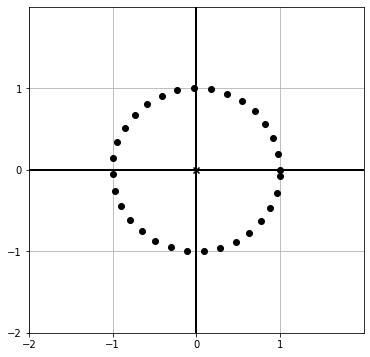

In [14]:
# 按 2pi 弧度 (360°) 产生极坐标集合
vectors = [
    to_cartesian((1, n / 10))
    for n in range(0, int(2 * pi) * 10 + 3, 2)
]

# 绘制极坐标
draw(
    Points(*vectors),
)


**练习:** 将一个笛卡尔坐标向量集合逆时针旋转 `pi/4`

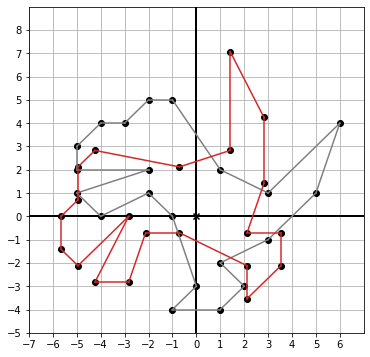

In [15]:
# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]


def to_polar_and_rotate(v: Vector2D) -> PolarVector:
    """
    将笛卡尔坐标转为极坐标, 并进行旋转

    Args:
        v (Vector2D): 将笛卡尔坐标

    Returns:
        PolarVector: 旋转后的极坐标
    """
    # 笛卡尔坐标转为极坐标
    pv = to_polar(v)
    # 返回逆时针旋转 pi / 4 弧度后的极坐标
    return (pv[0], pv[1] + (pi / 4))


# 将集合中的坐标转为极坐标
new_dino_vectors = [
    to_cartesian(to_polar_and_rotate(v))  # 遍历每个笛卡尔坐标, 转为极坐标, 旋转后转回笛卡尔坐标
    for v in dino_vectors
]

# 绘制图形
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors, color=Color.gray),
    Points(*new_dino_vectors),
    Polygon(*new_dino_vectors, color=Color.red),
)


**知识:** 由此可得出坐标旋转的算法: 笛卡尔坐标转为极坐标, 对极坐标中表示弧度的值进行加减, 得到新的极坐标, 再转回笛卡尔坐标

In [16]:
def rotate(radian: Number, vectors: Iterable[Vector2D]):
    def _pipeline(vector: Vector2D) -> Vector2D:
        l, a = to_polar(vector)
        return to_cartesian((l, a + radian))

    return [_pipeline(v) for v in vectors]


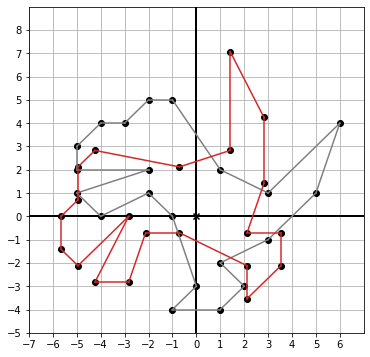

In [17]:
new_dino_vectors = rotate(pi / 4, dino_vectors)

# 绘制图形
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors, color=Color.gray),
    Points(*new_dino_vectors),
    Polygon(*new_dino_vectors, color=Color.red),
)


**知识**: 在坐标旋转的基础上增加移动, 即可组合出更复杂的操作

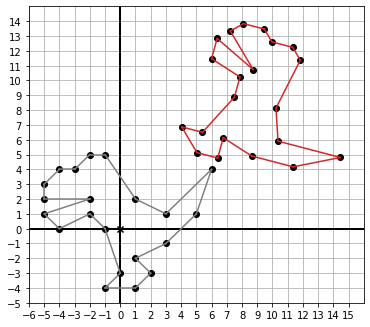

In [18]:
# 组合坐标的旋转和移动, 可以将图形进行组合变换
new_dino_vectors = translate(
    (8, 8),  # 指定要移动的坐标
    rotate(5 * pi / 3, dino_vectors),  # 旋转坐标
)

# 绘制图形
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors, color=Color.gray),
    Points(*new_dino_vectors),
    Polygon(*new_dino_vectors, color=Color.red),
)
